# Step-1: Data loading and cleaning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [6]:
df.rename(columns ={
    'X1': 'Relative_Compactness', 
    'X2': 'Surface_Area' , 
    'X3': 'Wall_Area',
    'X4': 'Roof_Area', 
    'X5': 'Overall_Height', 
    'X6': 'Orientation', 
    'X7': 'Glazing_Area', 
    'X8': 'Glazing_Area_Distribution', 
    'Y1': 'Heating_Load', 
    'Y2': 'Cooling_Load'
}, inplace=True)

In [7]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

# Step-2:Data Exploration

## Exploring Heating Load

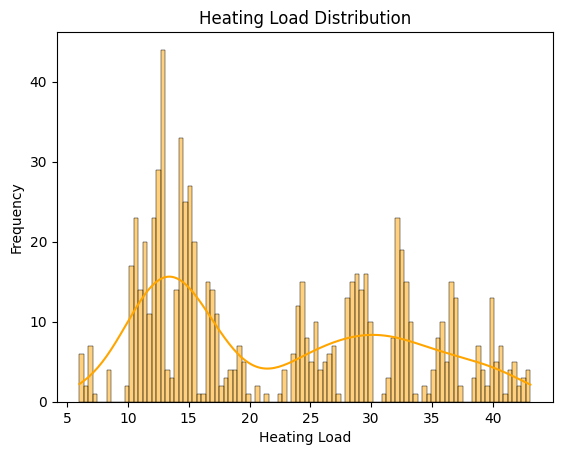

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution plot
sns.histplot(df['Heating_Load'], kde=True, bins=100, color='orange')
plt.title('Heating Load Distribution')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()

* Distribution Shape:

    * The distribution appears bimodal, with two distinct peaks:

    * The first peak is around a heating load of 15.

    * The second peak is between 30 and 35.

    * This suggests the dataset may include two distinct groups of buildings with different heating efficiency characteristics.

* Skewness:

    * The data is slightly right-skewed, with most buildings having heating loads between 10 and 20, while higher heating loads (above 35) are less common.

* Range:

    * The heating load spans approximately from 5 to 45, with the majority concentrated in the range 10–35.

* Density:

    * The highest density is observed around 15, indicating that many buildings have relatively low heating load requirements.

* Tail Behavior:

    * The right tail (above 35) gradually decreases, indicating that buildings with very high heating loads are rare but do exist.

## Exploring Cooling Load

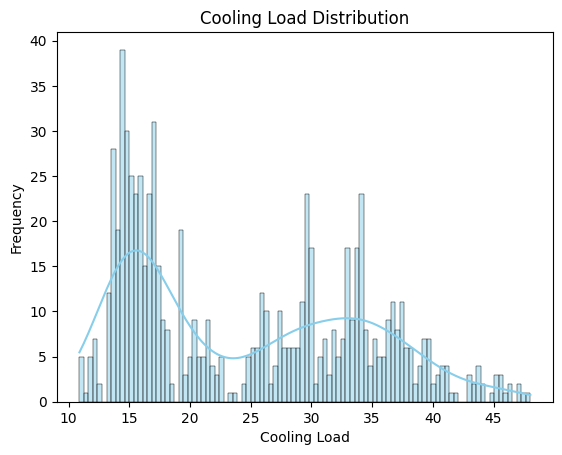

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution plot

sns.histplot(df['Cooling_Load'], kde=True, bins=100, color='skyblue')

plt.title('Cooling Load Distribution')

plt.xlabel('Cooling Load')

plt.ylabel('Frequency')

plt.show()

* Skewed Distribution:

    * The distribution is slightly right-skewed, indicating that most buildings in the dataset have lower cooling loads (around 15–25).

    * Higher cooling loads (above 30) are less frequent, with very few buildings having loads above 40.

* Modes:

    * There appear to be multiple peaks in the distribution, suggesting the presence of distinct clusters or groups in the dataset.

    * This might reflect differences in building characteristics (e.g., relative compactness, wall area, glazing area).

* Range:

    * The Cooling Load spans approximately from 10 to 45, with the majority concentrated between 15 and 30.

* Density:

    * The highest density of data points lies in the range of 15–20, indicating that many buildings are optimized for lower cooling loads.

* Tail Behavior:

    * The right tail of the distribution shows a gradual decline, suggesting that extreme cooling loads are rare.

## Identifying correlation between other features

<Axes: >

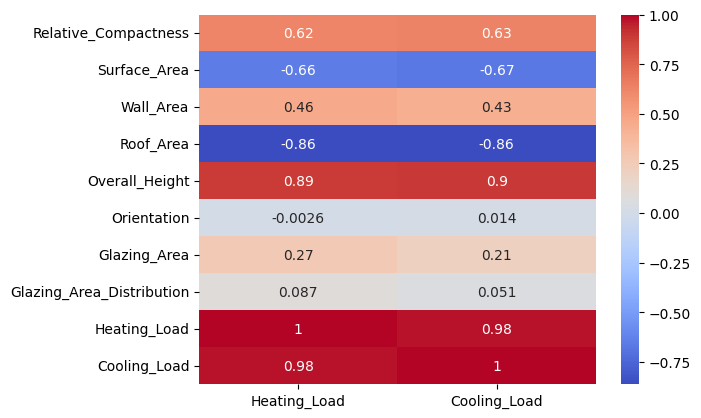

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns

correlation = df.corr()[['Heating_Load','Cooling_Load']]

sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Grouping Heating and Cooling Classes

In [12]:
# Define groups for Heating_Load

def classify_heating(value):

    if value <= 20:

        return 0  # Low

    elif value <= 30:

        return 1  # Medium

    else:

        return 2  # High



# Define groups for Cooling_Load

def classify_cooling(value):

    if value <= 20:

        return 0  # Low

    elif value <= 30:

        return 1  # Medium

    else:

        return 2  # High



# Apply to the dataset

df['Heating_Class'] = df['Heating_Load'].apply(classify_heating)

df['Cooling_Class'] = df['Cooling_Load'].apply(classify_cooling)



# Display the updated dataset

print(df[['Heating_Load', 'Heating_Class', 'Cooling_Load', 'Cooling_Class']].head())


   Heating_Load  Heating_Class  Cooling_Load  Cooling_Class
0         15.55              0         21.33              1
1         15.55              0         21.33              1
2         15.55              0         21.33              1
3         15.55              0         21.33              1
4         20.84              1         28.28              1


In [13]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Heating_Class,Cooling_Class
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760,0.744792,0.877604
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306,0.845248,0.877426
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,0.000000,0.000000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,0.000000,0.000000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,0.000000,1.000000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,2.000000,2.000000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,2.000000,2.000000


In [14]:
result = round(df.groupby('Heating_Class')['Heating_Load'].agg(['mean', 'max', 'min','count']),2)
print(result)


                mean    max    min  count
Heating_Class                            
0              13.47  19.95   6.01    397
1              26.82  30.00  20.71    170
2              35.94  43.10  30.05    201


In [15]:
result = round(df.groupby('Cooling_Class')['Cooling_Load'].agg(['mean', 'max', 'min','count']),2)
print(result)

                mean    max    min  count
Cooling_Class                            
0              15.54  19.90  10.90    348
1              25.98  30.00  20.01    166
2              36.07  48.03  30.02    254


# Analysis of classification - Heating load Vs. Cooling Load

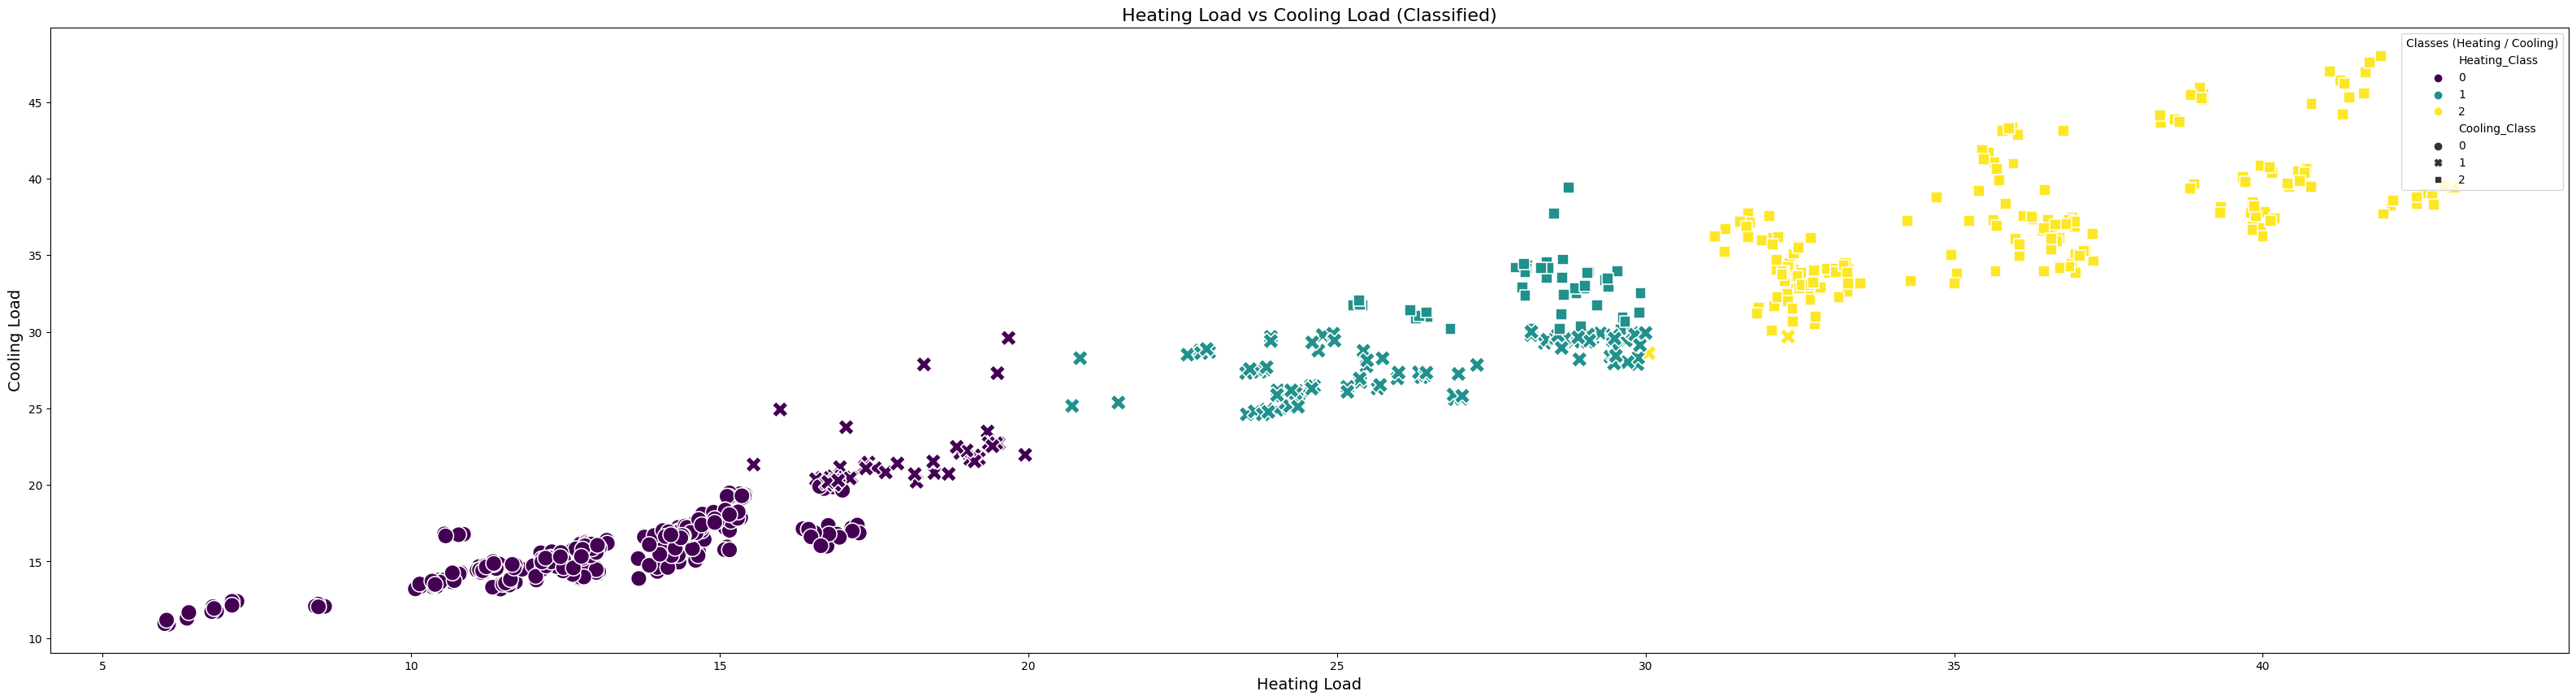

In [16]:
import matplotlib.pyplot as plt

import seaborn as sns


# Scatter plot with Heating_Class and Cooling_Class as hue

plt.figure(figsize=(40, 10))

sns.scatterplot(

    data=df,

    x="Heating_Load",

    y="Cooling_Load",

    hue="Heating_Class",

    style="Cooling_Class",

    palette="viridis",

    s=200

)

plt.title("Heating Load vs Cooling Load (Classified)", fontsize=16)

plt.xlabel("Heating Load",fontsize=14)

plt.ylabel("Cooling Load",fontsize=14)

plt.legend(title="Classes (Heating / Cooling)", loc="upper right")

plt.show()



* There is a strong positive correlation between Heating_Load and Cooling_Load.
* The data is well-separated into three Heating_Class groups (0, 1, 2) and three Cooling_Class groups (0, 1, 2).
* Buildings in Heating_Class 0 (low heating load) tend to also fall under Cooling_Class 0 or Cooling_Class 1.
* Higher heating load (Heating_Class 2) corresponds mostly to higher cooling load (Cooling_Cla
ng_Class 2).

Patterns:

* The separation between classes indicates that the classification criteria (thresholds for heating and cooling) effectively group the data into meaningful categories.

* The Cooling_Class variations (indicated by different shapes) are visible across the heating classes, showing additional granularity.


## Average Heating Load by Heating and Cooling Classes

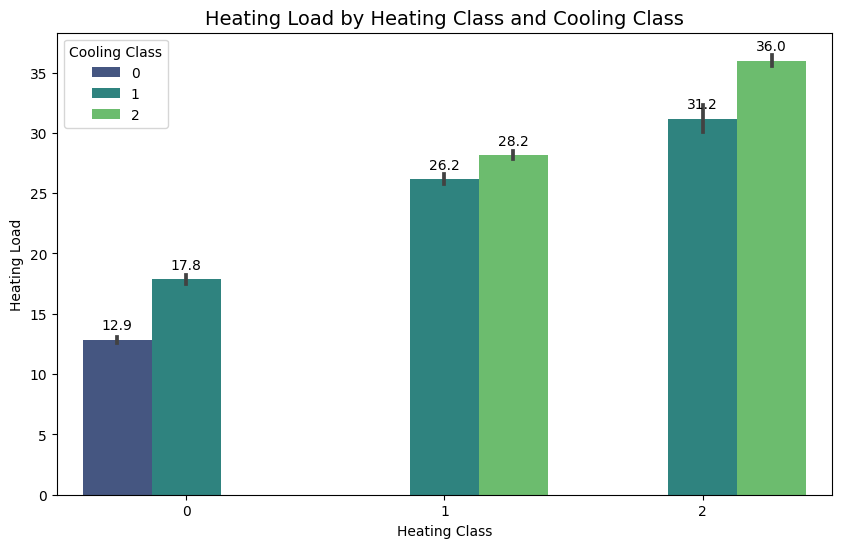

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=df, x="Heating_Class", y="Heating_Load", hue="Cooling_Class", palette="viridis")

# Adding values on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f'{height:.1f}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Customizations
plt.title("Heating Load by Heating Class and Cooling Class", fontsize=14)
plt.xlabel("Heating Class")
plt.ylabel("Heating Load")
plt.legend(title="Cooling Class")
plt.show()


In [18]:
# Full data grouped only by Heating_Class
heating_summary = df.groupby('Heating_Class')['Heating_Load'].agg(['mean', 'max', 'min', 'count'])
print(heating_summary)

# Grouped by Heating_Class and Cooling_Class
avg_data = df.groupby(['Heating_Class', 'Cooling_Class'])[['Heating_Load']].mean().reset_index()
print(avg_data)


                    mean    max    min  count
Heating_Class                                
0              13.471940  19.95   6.01    397
1              26.823294  30.00  20.71    170
2              35.938358  43.10  30.05    201
   Heating_Class  Cooling_Class  Heating_Load
0              0              0     12.856034
1              0              1     17.846122
2              1              1     26.177826
3              1              2     28.172909
4              2              1     31.180000
5              2              2     35.986181



* As Heating_Class increases, the average Heating_Load increases significantly.

* For each Heating_Class, buildings in Cooling_Class 2 have higher average Heating_Load than those in Cooling_Class 1 or Cooling_Class 0.

* There’s a consistent trend where buildings with higher cooling loads (Cooling_Class 2) also tend to have higher heating loads.

* Patterns:

    * The relationship between heating and cooling classes suggests that buildings with higher energy requirements for heating often need more cooling, possibly due to inefficiencies in insulation or design


## Heating of Heating and Cooling Classes

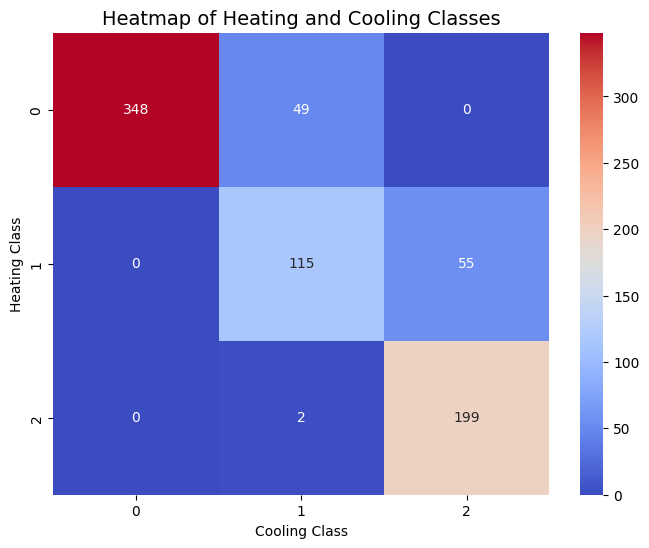

In [19]:
# Heatmap of Heating_Class and Cooling_Class distribution

heatmap_data = df.groupby(['Heating_Class', 'Cooling_Class']).size().unstack(fill_value=0)



plt.figure(figsize=(8, 6))

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Heating and Cooling Classes", fontsize=14)

plt.xlabel("Cooling Class")

plt.ylabel("Heating Class")

plt.show()